## Overview

We are going to examine why males had lower mean survival rate than females. We will start by exploring distributions of PClass, Age, SibSp, Parch, and Sex variables. Then, we will stratify each variable to examine factors that influenced difference in mean survival rate between male and female.

## First Look at the Data

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

Let's load a data and see how our data is organized.

In [2]:
file_name = 'titanic_data.csv'
titanic_df = pd.read_csv(file_name)# read titanic_data.csv into Pandas Dataframe

print titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


The table shows we have total of 891 passengers, and have 12 variables. It looks like Age, Cabin, and Embarked fields are missing some values. 

In [3]:
titanic_df[['Age','Cabin','Embarked']].count()/891

Age         0.801347
Cabin       0.228956
Embarked    0.997755
dtype: float64

Cabin field is missing about 80% of its data points. Age and Embarked retain about 80% and 99% of data points, respectively.

In [4]:
print titanic_df[['Age','Cabin','Embarked']].iloc[:28]
print
print list(titanic_df[['Cabin']].iloc[27])

     Age        Cabin Embarked
0   22.0          NaN        S
1   38.0          C85        C
2   26.0          NaN        S
3   35.0         C123        S
4   35.0          NaN        S
5    NaN          NaN        Q
6   54.0          E46        S
7    2.0          NaN        S
8   27.0          NaN        S
9   14.0          NaN        C
10   4.0           G6        S
11  58.0         C103        S
12  20.0          NaN        S
13  39.0          NaN        S
14  14.0          NaN        S
15  55.0          NaN        S
16   2.0          NaN        Q
17   NaN          NaN        S
18  31.0          NaN        S
19   NaN          NaN        C
20  35.0          NaN        S
21  34.0          D56        S
22  15.0          NaN        Q
23  28.0           A6        S
24   8.0          NaN        S
25  38.0          NaN        S
26   NaN          NaN        C
27  19.0  C23 C25 C27        S

['C23 C25 C27']


Missing values are filled with 'NaN,' and some values of Cabin field is not a single value. Note value in index 27 above. It is a space separated string.

Next, we will check if there are any duplicates of passengers in the data by comparing a total number of 'PassengerId' variables with a number of unique 'PassengerID' variables. 

In [5]:
print titanic_df[['PassengerId']].count()
print titanic_df.drop_duplicates('PassengerId', keep = False)['PassengerId'].count()

PassengerId    891
dtype: int64
891


There were no duplicate passengers.

## Distribution of Variables

We will explore a distribution of following variables: PClass, Age, SibSp, Parch, and Sex.

### Distribution of Pclass

In [6]:
#reference: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
def auto_annotate_raw(ax, size_val = None):
    """Annotate height of each ax object and its percentage
    Args: 
        ax: ax object of a plot
        size_val: font size of an annotation
    Returns:
        Annotate height and percentation of each bar in a plot
    """
    total_count = 0
    # iterate over each bar graph to caculate total count
    for p in ax.patches:
        total_count += p.get_height()
    
    # iterate over each bar and annotate count and percentage
    for p in ax.patches:
        str_percentage = str(np.round(p.get_height()/total_count * 100,decimals=2)) + '%'
        str_raw_number = str(int(p.get_height()))
        ax.annotate(str_raw_number+'('+str_percentage+')', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size = size_val)

def plot_bar_from_df_raw_number(df,var, title_addendum = None):
    """Plot bar graph from a data frame for a given variable
    Args:
        df: Dataframe object of Pandas with which the function draws
            bar graph
        var: Variable to group by
    """
    if not title_addendum:
        title_addendum = ''
    plt.figure()
    plt.ylabel('Number of Passengers')
    plt.title('Distribution of '+ var + ' ' + title_addendum)
    
    #group by a variable, var, and count how many each group has using 'PassengerId' field
    #each value of 'PassengerId' counts as one person
    ax = df.groupby(var)['PassengerId'].count().plot(kind = 'bar', rot = 0)
    auto_annotate_raw(ax)

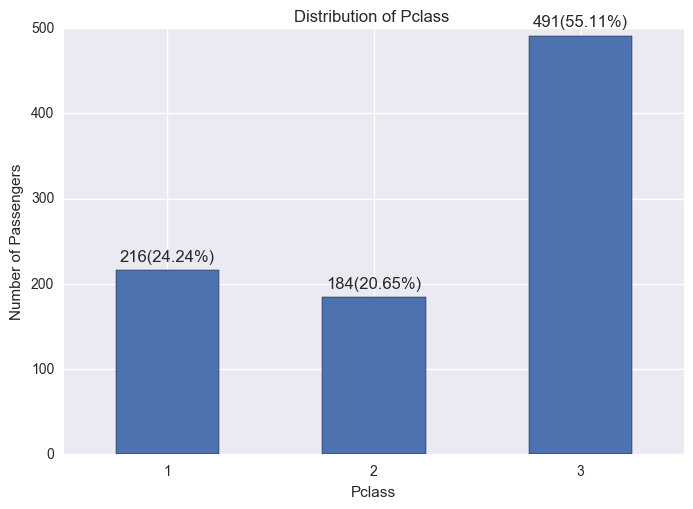

In [7]:
plot_bar_from_df_raw_number(titanic_df,'Pclass')


Pclass1, Pclass2, and Pclass 3 made up 24.24%, 20.65%, 55.11% of the passengers.

### Distribution of Age

,Age
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


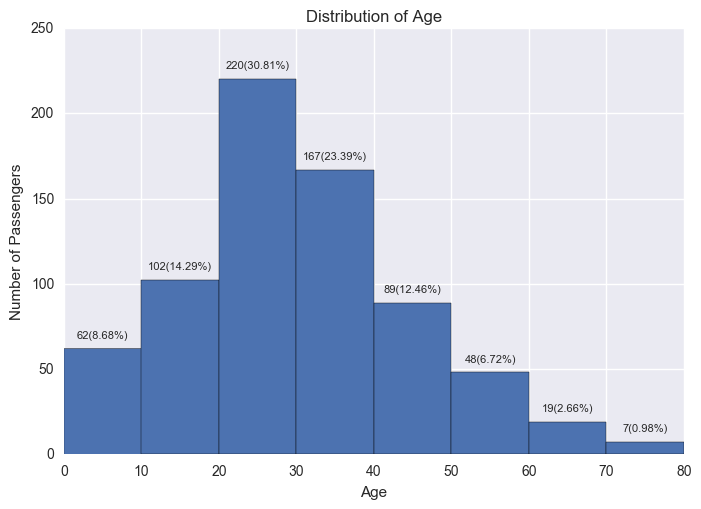

In [8]:
plt.figure()
titanic_df_age = titanic_df[['Age']] #get the values of Age field of titanic_df into a Dataframe
ax = titanic_df_age.plot(kind = 'hist', range = (0,80), bins = 8, legend = False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
auto_annotate_raw(ax, 8)
titanic_df_age.describe()[1:]

Mean age was about 29 years old and the mode of the distribution was 20 - 30 year old age group. Median age of the passengers was 28 years old.

### Distribution of Number of  Siblings/Spouses Aboard and Parents/Children Aboard

         SibSp
mean  0.523008
std   1.102743
min   0.000000
25%   0.000000
50%   0.000000
75%   1.000000
max   8.000000
         Parch
mean  0.381594
std   0.806057
min   0.000000
25%   0.000000
50%   0.000000
75%   0.000000
max   6.000000


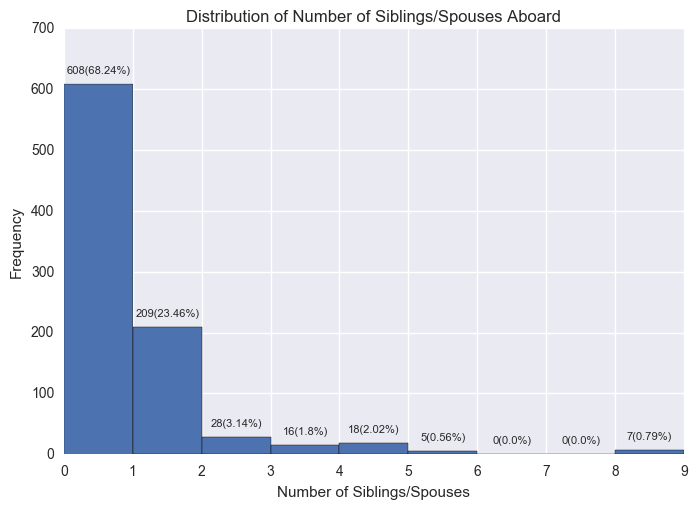

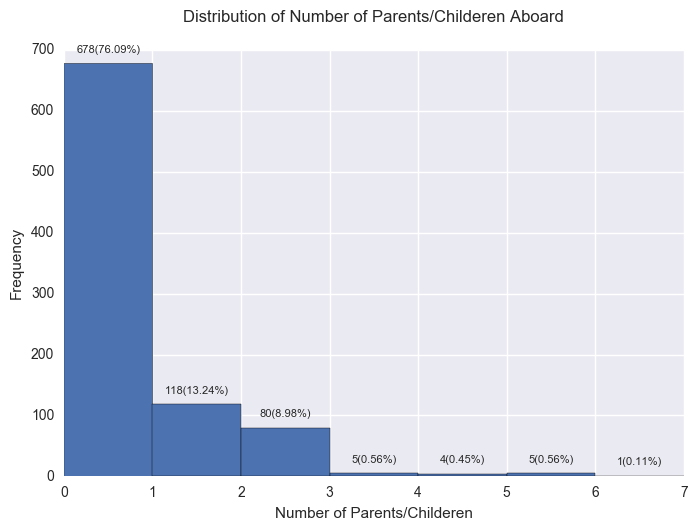

In [9]:
# get the values of Sibsp and Parch field of titanic_df into a Dataframe
titanic_df_sibsp = titanic_df[['SibSp']]
titanic_df_parch = titanic_df[['Parch']]

plt.figure()
ax_sibsp = titanic_df_sibsp.plot(kind = 'hist', range = (0,9), bins = 9, legend = False)
plt.title('Distribution of Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
auto_annotate_raw(ax_sibsp, 8)
print titanic_df_sibsp.describe()[1:]

plt.figure()
ax_parch = titanic_df_parch.plot(kind = 'hist', range = (0,7), bins = 7, legend = False)
plt.title('Distribution of Number of Parents/Childeren Aboard', y = 1.05)
plt.xlabel('Number of Parents/Childeren')
auto_annotate_raw(ax_parch, 8)
print titanic_df_parch.describe()[1:]

Majority of passengers had less than one siblings/spouses or parents/children. 

### Distribution of Gender

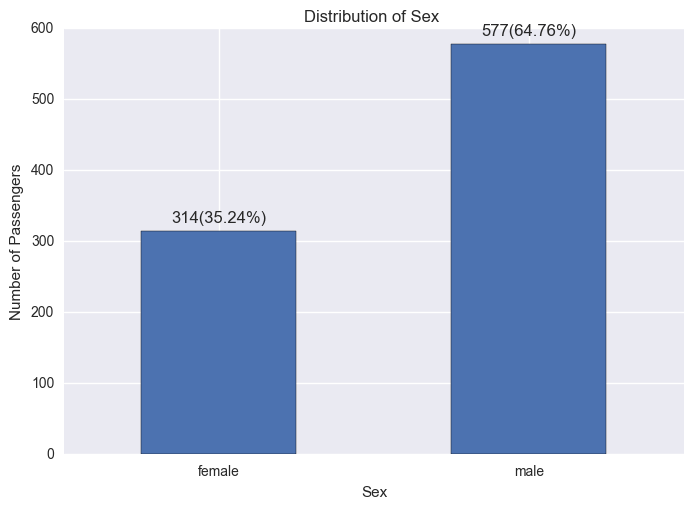

In [10]:
plot_bar_from_df_raw_number(titanic_df,'Sex')

64.76% of boarded passengers were males and 35.24% of them were females.

### Distribution of Survial Rate by Gender

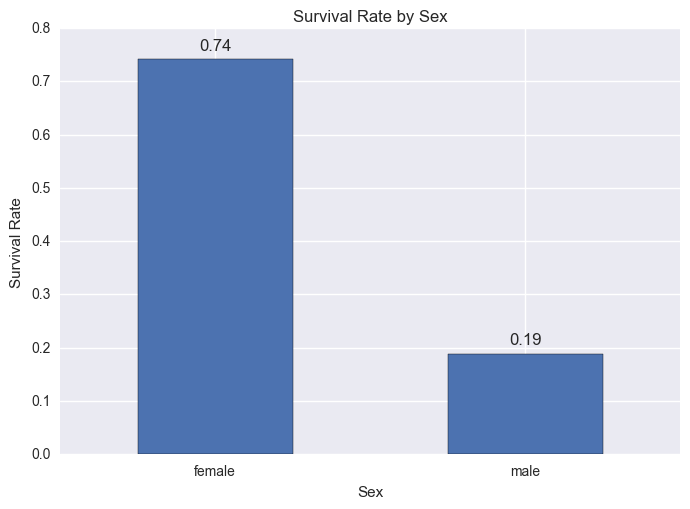

In [11]:
from scipy.stats import ttest_ind

def auto_annotate_survival_rate(ax):    
    """Annotate a height of a bar graph
        Args: 
            ax: ax object of a plot
    """
    #iterate over each bar and annotate its height/value
    for p in ax.patches:
        str_raw_number = str(np.round(p.get_height(), decimals = 2))
        ax.annotate(str_raw_number, (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

def plot_bar_from_df_survival_rate(df,var):
    """plot bar graph of survival rate of a group
        Args:
            df: Pandas Dataframe object
            var: a variable to group by
    """
    plt.ylabel('Survival Rate')
    plt.title('Survival Rate by '+var)
    
    #group by variable, var, and select 'Survived' column to calculate its mean, which
    #is a survival rate of that variable
    ax = df.groupby(var)['Survived'].mean().plot(kind = 'bar', rot = 0)
    auto_annotate_survival_rate(ax)        

plot_bar_from_df_survival_rate(titanic_df,'Sex')

74% of females survived, whereas only 19% of males survived. 

We will peform two-tailed independent two samples t-test to verify these mean surivial rates were significantly different. We assume female and male population were approximately Normal and did not affect each other's survival rate. We also assume Titanic sample data could estimate population variances. Here, we do not assume male and female population's survival rate variances were roughly equal. Thus, we are going to perform Welch’s t-test.

In [12]:
# narrow titanic_df to males and females
titanic_df_male = titanic_df[titanic_df['Sex'] == 'male']
titanic_df_female = titanic_df[titanic_df['Sex'] == 'female']

# select 'Survived' column from gender specific titanic_df and turn
# it into NumPy array
array_male_survived = titanic_df_male['Survived'].as_matrix()
array_female_survived = titanic_df_female['Survived'].as_matrix()

print ttest_ind(array_male_survived, array_female_survived, equal_var = False)

Ttest_indResult(statistic=-18.67183317725917, pvalue=2.2836009226010537e-61)


Given p-value of 2.28 e-61, we can conclude mean survival rate between male and female were significantly different with alpha level of 0.01. 

Next, we will control for gender and see if there was any deeper pattern in each gender's survival rate associated with its class.

### Distribution of Survival Rate by Class for Each Gender

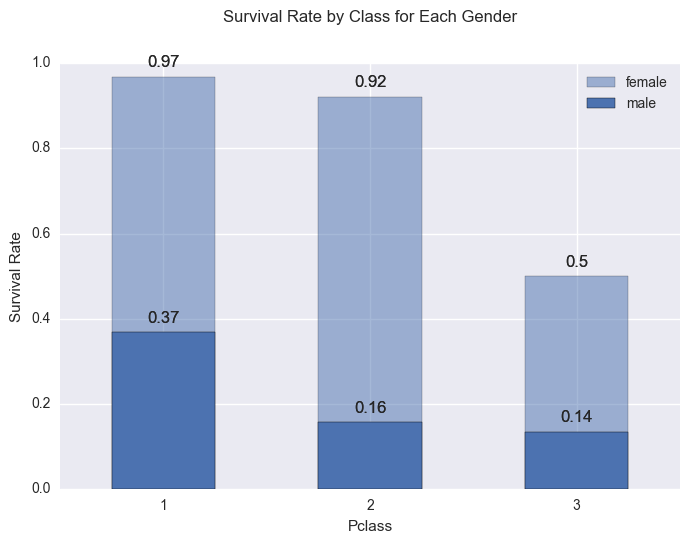

In [13]:
plt.figure()

# Group gender specific titanic_df by 'Pclass' and choose 'Survived' column.
# Then, aggregate each group by calculating the mean, 
# and plot the bar graph by or survival rate for each group
ax_female = titanic_df_female.groupby('Pclass')['Survived'].mean().plot(kind = 'bar', rot = 0, alpha = 0.5)
ax_male = titanic_df_male.groupby('Pclass')['Survived'].mean().plot(kind = 'bar', rot = 0, alpha = 1)

plt.legend(('female','male'))
auto_annotate_survival_rate(ax_female)
auto_annotate_survival_rate(ax_male)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class for Each Gender', y = 1.08)


We can observe lower the class of passengers, lower the surivial rate of both male and female.
We can observe that for a female Pclass 2 had as good of chance of surviving as female Pclass 1.
whereas, for a male Pclass 2's chance of surviving was similar to male Pclass 3's.

Let's examine if survival rate of Pclass 1 and 2 of female were significantly different, and survival rate of Pclass 2 and 3 of male were significantly different. 

We are going to peform two-tailed independent two samples t-test as before. Again, we assume female and male population were approximately Normal and did not affect each other's survival rate. We also assume Titanic sample data could estimate population variances, but we do not assume male and female population's survival rate variances were roughly equal.

In [14]:
def perform_ttest_ind_1(df, sex, p_class1, p_class2):
    """Perform a two-tailed, two-sample Welch’s t-test to find if there 
       is a significant difference in mean survival rate between two different
       Pclasses given a specific gender.
       
       Args: 
           df: Pandas Dataframe object.
           sex: 'male' or 'female'.
           p_class1: Pclass 1, 2, or 3.
           p_class2: Pclass 1, 2, or 3; must be different from p_class1.
           
        Returns:
            t-stat, p-value.
    """
    # Narrow a dataframe by specific sex and class, and select 'Survived' column.
    # Then, turn it into NumPy matrix
    sample1_arry = df[(df['Sex'] == sex) & (df['Pclass'] == p_class1)]['Survived'].as_matrix()
    sample2_arry = df[(df['Sex'] == sex) & (df['Pclass'] == p_class2)]['Survived'].as_matrix()
    
    return ttest_ind(sample1_arry,sample2_arry,equal_var=False)

print perform_ttest_ind_1(titanic_df, 'male', 2, 3)
print perform_ttest_ind_1(titanic_df, 'female', 1, 2)

Ttest_indResult(statistic=0.55283585242789579, pvalue=0.58110416930406172)
Ttest_indResult(statistic=1.3035701834497937, pvalue=0.194804778438665)


With alpha level of 0.05, we cannot reject there was a signifcant difference between mean survival rate of Pclass2 and Pclass3 of male as well as between mean survival rate of Pclass1 and Pclass2 of female.

We would also like to affirm whether there was a signifcant difference between mean survival rate of Pclass1 and Pclass3 for both sexes. We will perform same t-test with the same assumptions.


In [15]:
print perform_ttest_ind_1(titanic_df, 'male', 1, 3)
print perform_ttest_ind_1(titanic_df, 'female', 1, 3)

Ttest_indResult(statistic=4.9071100492173398, pvalue=2.1971710996570051e-06)
Ttest_indResult(statistic=10.262284582752971, pvalue=5.6477052819398876e-20)


With alpha level of 0.01, we can conclude there was a significant differences in mean survival rate between Pclass1 and Pclass3 for both sexes.

Let's perform another t-test holding the same assumptions to verify if there was a significant difference in mean survival rate between male and female, controlling for a class variable.

In [16]:
def perform_ttest_ind_2(df, p_class):
    """Perform a two-tailed, two-sample Welch’s t-test to find if there 
       is a significant difference in mean survival rate between male and female
       given a Pclass.
       
       Args: 
           df: Pandas Dataframe object.
           p_class: Pclass 1, 2, or 3.
           
        Returns:
            t-stat, p-value.
    """
    # Narrow a dataframe by female or male, and a specific class, choose 'Survived' column and
    # turn it into NumPy array.
    sample1_arry = df[(df['Sex'] == 'female') & (df['Pclass'] == p_class)]['Survived'].as_matrix()
    sample2_arry = df[(df['Sex'] == 'male') & (df['Pclass'] == p_class)]['Survived'].as_matrix()  
    
    return str(ttest_ind(sample1_arry,sample2_arry,equal_var=False))

print 'Pclass 1: ' + perform_ttest_ind_2(titanic_df, 1)
print 'Pclass 1: ' + perform_ttest_ind_2(titanic_df, 2)
print 'Pclass 1: ' + perform_ttest_ind_2(titanic_df, 3)

Pclass 1: Ttest_indResult(statistic=12.615596808199955, pvalue=8.9051780879894606e-26)
Pclass 1: Ttest_indResult(statistic=16.247532625005206, pvalue=3.1488266977157878e-37)
Pclass 1: Ttest_indResult(statistic=7.9805295231113904, pvalue=1.1012181299889578e-13)


With p-value of 8.9e-26, 3.14e-37, and 1.10e-13 respecitively for each class, male and female survival rate were sigfinificantly different, controlling for the class. Even if we were able to find survival rate between clasees, females were still more likely to survive for each class than males.


We will now examine Age variable to investigate what may be contributing a difference in survival rate between male and female.

### Distribution of Survival Rate by Age Group for Each Gender

mean    30.726645
std     14.678201
min      0.420000
25%     21.000000
50%     29.000000
75%     39.000000
max     80.000000
Name: Age, dtype: float64
mean    27.915709
std     14.110146
min      0.750000
25%     18.000000
50%     27.000000
75%     37.000000
max     63.000000
Name: Age, dtype: float64


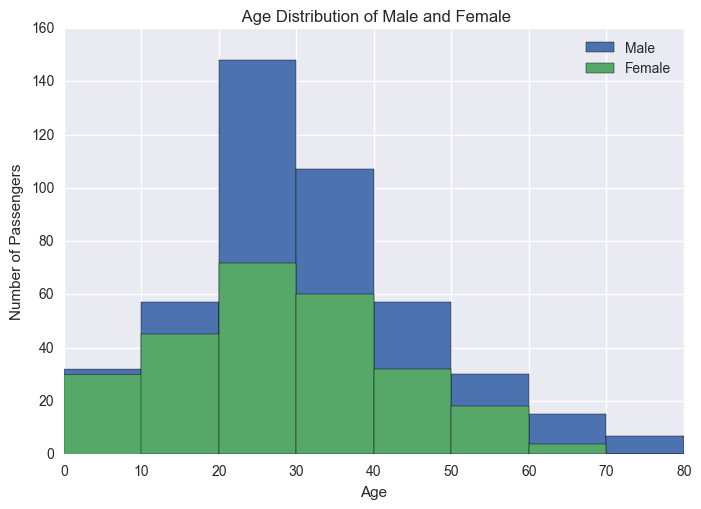

In [20]:
def plot_two_dist(df1, df1_legend, df2, df2_legend, gender = None, color1 = None, color2 = None, alpha1 = None, alpha2 = None):
    """plot age distribution of male and female in a same figure
    Args: 
        df1: first Dataframe
        df1_legend: legend of df1
        df2: second Dataframe
        df2_legend: legend of df2
        gender: 'Male' or 'Female' when df1 and df2 are data sets containing dead and survived
        color1: color of subplot of df1
        color2: color of subplot of df2
        alpha1: transparency of subplot of df1
        alpha2: transparency of subplot of df2     
    """
    if not gender:
        gender = ''
    plt.figure()
    
    # missing values, 'NaN,' are treated as 0
    df1.plot(kind = 'hist', range = (0,80), bins = 8, alpha = alpha1, color = color1) 
    df2.plot(kind = 'hist', range = (0,80), bins = 8, alpha = alpha2, color = color2)
    
    plt.legend((df1_legend,df2_legend))
    plt.title('{} Age Distribution of '.format(gender) + df1_legend + ' and ' + df2_legend)
    plt.xlabel('Age')
    plt.ylabel('Number of Passengers')
    
# Narrow titanic_df to a specific gender and choose 'Age' field.
df_male_age = titanic_df[titanic_df['Sex'] == 'male']['Age']
df_female_age = titanic_df[titanic_df['Sex'] == 'female']['Age']

print df_male_age.describe()[1:]
print df_female_age.describe()[1:]

plot_two_dist(df_male_age, 'Male', df_female_age, 'Female')

Male and female had similar age distribution. The mode of male and female age was 20 - 30 years old although males outnumbered females by almost two fold. Mean age of male and female were about 30 and 28 years old, respectively.

Let's look at the age distribution of survived males and females.

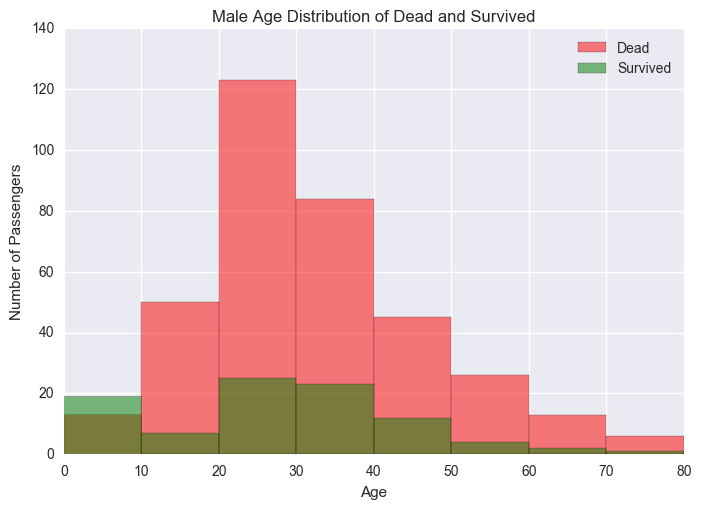

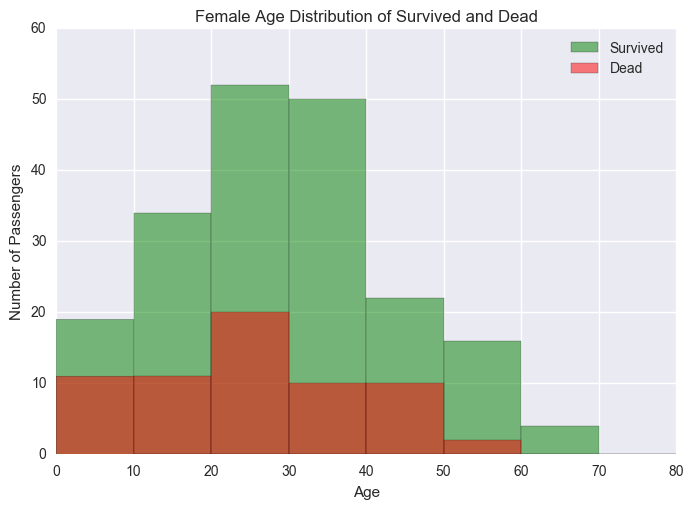

In [21]:
# Filter titanic_df by whether a passenger survived and a specific gender, and
# then choose 'Age' column to get values of age of survived or dead, male or female passenger
survived_df_male_age = titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'male')]['Age']
not_survived_df_male_age = titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Sex'] == 'male')]['Age']
survived_df_female_age = titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'female')]['Age']
not_survived_df_female_age = titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Sex'] == 'female')]['Age']

plot_two_dist(not_survived_df_male_age, 'Dead', survived_df_male_age, 'Survived', 'Male', 'Red', 'Green', alpha1 = 0.5, alpha2 = 0.5)
plot_two_dist(survived_df_female_age, 'Survived', not_survived_df_female_age, 'Dead', 'Female', 'Green', 'Red', alpha1 = 0.5, alpha2 = 0.5)

For males, the dead outnumbered the survived except for the age group of 0-10 years old. Whereas, for females, the survived outnumbered the dead for every age group. It seems age group of 20 to 40 which made up large proportion of males might have reduced the overall survival rate of males.

We will move on to SibSp and Parch variables to see if there is another pattern that can explain the difference between male and female survival rate.

### Distribution of Number of Siblings/Spouses Aboard for Male and Female

Male: Number of Siblings/Spouses
count    577.000000
mean       0.429809
std        1.061811
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: SibSp, dtype: float64

Female: Number of Siblings/Spouses
count    314.000000
mean       0.694268
std        1.156520
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


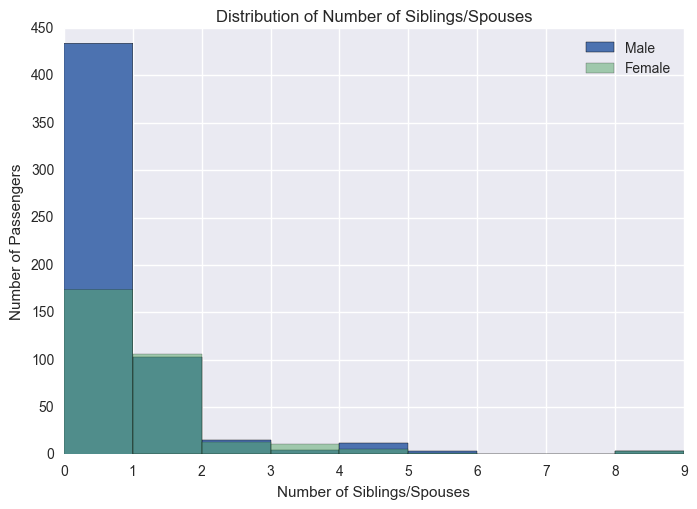

In [22]:
def plot_num_family_hist_by_gender(male_df,female_df, minn1, maxx1, minn2, maxx2, bin_val1, bin_val2, var_name):
    """ plot male and female distribution of family size on a same figure
        Args:
            male_df: male data set of Dataframe with number of family members
            female_df: female data set of Dataframe with number of family members
            minn1: minimum number of family members in a data set of males
            maxx1: maximum number of family members in a data set of males
            minn2: minimum number of family members in a data set of females
            maxx2: maximum number of family members in a data set of females
            bin_val1: number of bins in histogram of male data set
            bin_val2: number of bins in histogram of female data set
            var_name: types of family member: 'Sibsp' or 'Parch' or Combined
    """
    plt.figure()    
    male_df.plot('hist', range = (minn1,maxx1), bins = bin_val1, alpha = 1)
    female_df.plot('hist', range = (minn1,maxx2), bins = bin_val2, alpha = 0.5)
    plt.legend(('Male','Female'))
    plt.title('Distribution of Number of ' + var_name)
    plt.xlabel('Number of ' + var_name)
    plt.ylabel('Number of Passengers')

# gender speicfic titanic_df dataframe with 'Sibsp' column values     
male_sibsp_df = titanic_df[titanic_df['Sex'] == 'male']['SibSp']
female_sibsp_df = titanic_df[titanic_df['Sex'] == 'female']['SibSp']

print 'Male: Number of Siblings/Spouses'
print male_sibsp_df.describe()
print
print 'Female: Number of Siblings/Spouses'
print female_sibsp_df.describe()

plot_num_family_hist_by_gender(male_sibsp_df, female_sibsp_df, 0, 9, 0, 9, 9, 9, 'Siblings/Spouses')


Males with no siblings or spouses outnumbered females by more than two fold. Otherwise, both distributions were similar in that they were both positively skewed. The Mode was a group with less than one sibling or spouse for male and female distributions.

 ### Distribution of Number of Parents/Children Aboard for Male and Female

Male: Number of Parents/Children
count    577.000000
mean       0.235702
std        0.612294
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Parch, dtype: float64

Female: Number of Parents/Children
count    314.000000
mean       0.649682
std        1.022846
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: Parch, dtype: float64


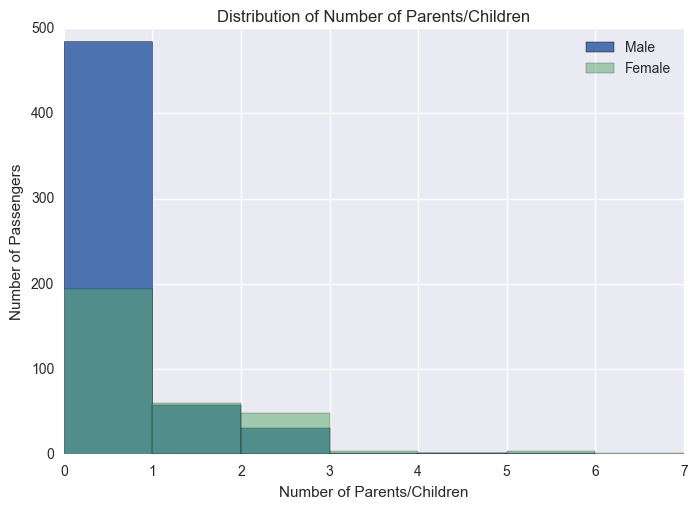

In [23]:
# gender speicfic titanic_df dataframe with 'Parch' column values   
male_parch_df = titanic_df[titanic_df['Sex'] == 'male']['Parch']
female_parch_df = titanic_df[titanic_df['Sex'] == 'female']['Parch']

print 'Male: Number of Parents/Children'
print male_parch_df.describe()
print
print 'Female: Number of Parents/Children'
print female_parch_df.describe()

plot_num_family_hist_by_gender(male_parch_df, female_parch_df, 0, 6, 0, 7, 6, 7, 'Parents/Children')


Similar to distributions of number of siblings and spouses, male and female distributions of number of parents or children were both positively skewed. Again, the mode was a group with less than one sibling or spouse for both male and female distributions.

We will combine number of siblings/spouses and number of parents/children variables to produce a distribution of number of family members.

Number of Passengers by Number of Family Members
         Female  Male
[0, 1)      126   411
[1, 2)       87    74
[2, 3)       49    53
[3, 4)       19    10
[4, 5)       12     3
[5, 6)        8    14
[6, 7)        8     4
[7, 8)        2     4
[8, 9)        0     0
[9, 10)       0     0


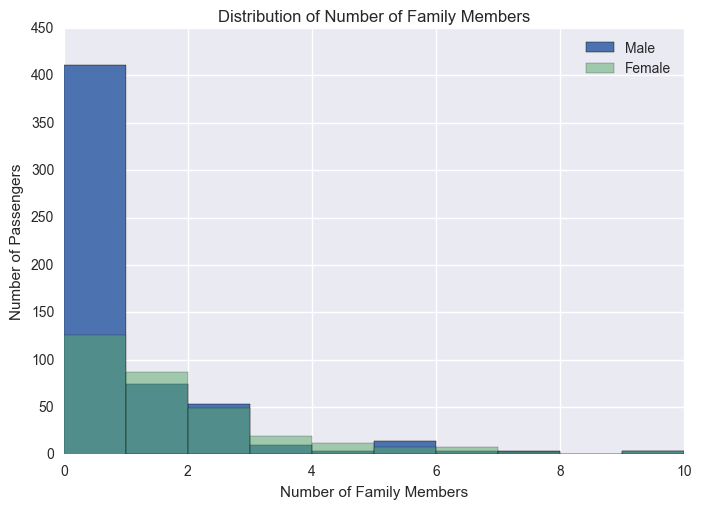

In [24]:
# Get the columns of 'Sibsp,' and 'Parch' from male or female titanic_df 
# then sum each row of values into single data frame
num_fam_male = titanic_df_male[['SibSp','Parch']].sum(axis = 1)
num_fam_female = titanic_df_female[['SibSp','Parch']].sum(axis = 1)

# Group each male and female titanic_df by family size of from 0 to 11 with increment of 1
# Then, aggregate a group by counting each data point of a group
gp_num_fam_male_by_family_num_count = titanic_df_male.groupby(pd.cut(num_fam_male, np.arange(0,11,1), right = False)).count()['PassengerId']
gp_num_fam_female_by_family_num_count = titanic_df_female.groupby(pd.cut(num_fam_female, np.arange(0,11,1), right = False)).count()['PassengerId']

# Consolidate two dataframes into one, with 'Male' and 'Female' field
num_fam_df = pd.DataFrame(dict(zip(['Male','Female'],[gp_num_fam_male_by_family_num_count, gp_num_fam_female_by_family_num_count])))
print 'Number of Passengers by Number of Family Members'
print num_fam_df

# Add two dataframes of number of Siblings/Spouses and of number of Parents/Children 
# to create a dataframe of family size for male and female
male_family_df = male_sibsp_df + male_parch_df
female_family_df = female_sibsp_df + female_parch_df

plot_num_family_hist_by_gender(male_family_df, female_family_df, 0, 10, 0, 10, 10, 10, 'Family Members')


The distribution of family size shows that males far outnumbered in a group in which they did not have any family members. 

We will examine survival rate of each group of family size for male and female.

### Mean Survival Rate within Each Group of Family Size

Number of Passengers Survived by Number of Family Members

         Female  Male
[0, 1)       99    64
[1, 2)       71    18
[2, 3)       38    21
[3, 4)       16     5
[4, 5)        3     0
[5, 6)        3     0
[6, 7)        3     1
[7, 8)        0     0
[8, 9)        0     0
[9, 10)       0     0

Number of Passengers by Number of Family Members

         Female  Male
[0, 1)      126   411
[1, 2)       87    74
[2, 3)       49    53
[3, 4)       19    10
[4, 5)       12     3
[5, 6)        8    14
[6, 7)        8     4
[7, 8)        2     4
[8, 9)        0     0
[9, 10)       0     0

Survival Rate of Passengers by Number of Family Members

          Female      Male
[0, 1)  0.785714  0.155718
[1, 2)  0.816092  0.243243
[2, 3)  0.775510  0.396226
[3, 4)  0.842105  0.500000
[4, 5)  0.250000  0.000000
[5, 6)  0.375000  0.000000
[6, 7)  0.375000  0.250000
[7, 8)  0.000000  0.000000


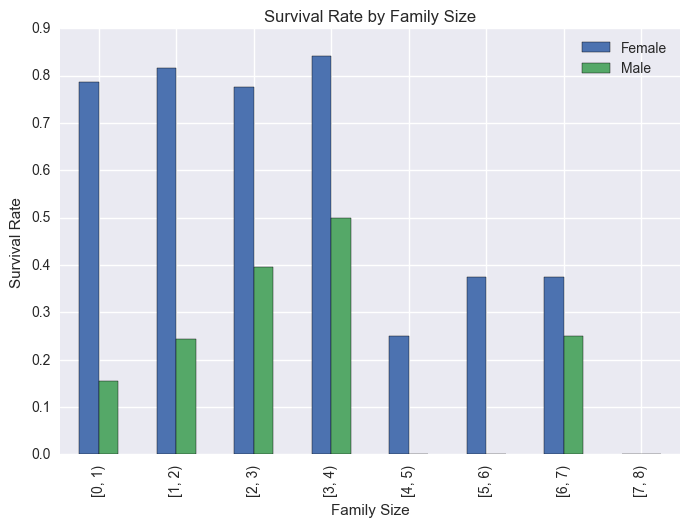

In [25]:
# Filter dataframe by gender and survived 
# to create survived male dataframe and survived female dataframe
male_survived = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 1)]
female_survived = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)]

# Get the columns of 'Sibsp,' and 'Parch' from survived male or female titanic_df 
# then sum each row of values into single data frame
num_fam_male_survived = male_survived[['SibSp','Parch']].sum(axis = 1)
num_fam_female_survived = female_survived[['SibSp','Parch']].sum(axis = 1)

# Group each survived male and female titanic_df by family size of from 0 to 11 with increment of 1
gp_num_fam_male_survived_by_family_num = male_survived.groupby(pd.cut(num_fam_male_survived, np.arange(0,11,1), right = False))
gp_num_fam_female_survived_by_family_num = female_survived.groupby(pd.cut(num_fam_female_survived, np.arange(0,11,1), right = False))

# Aggregate a group by counting each data point of a group then select 'PassengerId' column
gp_num_fam_male_survived_by_family_num_count = gp_num_fam_male_survived_by_family_num.count()['PassengerId']
gp_num_fam_female_survived_by_family_num_count = gp_num_fam_female_survived_by_family_num.count()['PassengerId']

# Consolidate two dataframes into one, with 'Male' and 'Female' field
num_fam_survived_df = pd.DataFrame(dict(zip(['Male', 'Female'],[gp_num_fam_male_survived_by_family_num_count, gp_num_fam_female_survived_by_family_num_count])))

print 'Number of Passengers Survived by Number of Family Members\n'
print num_fam_survived_df
print
print 'Number of Passengers by Number of Family Members\n'
print num_fam_df
print

# Create a dataframe of survival rate for each group of family size for male and female
gp_num_fam_male_survival_rate = gp_num_fam_male_survived_by_family_num_count/gp_num_fam_male_by_family_num_count
gp_num_fam_female_survival_rate = gp_num_fam_female_survived_by_family_num_count/gp_num_fam_female_by_family_num_count

# Consolidate two dataframes into one with 'Male', and 'Female' fields
# Then 'NaN' values, resulted from divison by 0, are dropped.
combined_gp_num_fam_survival_rate = pd.DataFrame(dict(zip(['Male','Female'],[gp_num_fam_male_survival_rate, gp_num_fam_female_survival_rate]))).dropna()

plt.figure()
ax_num_fam_survival_rate = combined_gp_num_fam_survival_rate.plot(kind = 'bar')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

print 'Survival Rate of Passengers by Number of Family Members\n'
print combined_gp_num_fam_survival_rate

Males with no family members had survival rate of roughly 15%. This group of males made up about 44% of male passengers. Groups with one and two family members with survival rate of 24% and 39% respectively were not able to counterbalance the low survival rate of a group with no family members becasue of its large weight in number of male passengers.

On the other hand, female group with no family members which also made up the majority of females had close to 80% survival rate. Moreover, groups with one and two family members had survival rate of 81% and 77% respectively. 

It seems that males with no family members having the most weight but the lowest survival rate lowered the average survival rate of the males.

## Findings and Limitations

In this analysis, we investigated what may be factors that influenced lower mean survival rate of males than of females. 

First, we examined the Pclass distribution of passengers. We discovered class affected survival rate of both male and female. Passegers of Pclass1 were more likely to survive than of Pclass3. Controlling for Pclass, females still fared better surviving the disaster. 

Second, we examined the Age distribution of passengers. We were able to find age 20 to 30 made up the majority of passengers for both genders. Males did not have better than 50% chance of surviving across all age groups with the exception of 0-10 year old bracket. Whereas, females had better than 50% chance of surviving across all age groups. 

Next, we explored the SibSp and Parch distribution of passengers. Both variables' distributions skewed to a positive direction. The mode for both distributions were the group with no family members. We summed these two variables to create the distribution of family size. This distribution was also positively skewed for both genders with mode of zero family members. Given almost 44% of male passengers lied in a group with no family members, we computed the survival rate of each group to see if that 44% of males heavily lowered the mean survival rate of male. With 15% survival rate, it seemed that that was the case--a group of males who made up the majority of passengers had the lowest survival rate, thus lowering the overall survival rate.

When we examined Age variable, we had to remove missing values, marked with'NaN' after loading into a Dataframe, which made up about 20% of data points. Omitting these data points might have changed the true distrubtion of age of the passengers.

Also, if we had more detailed information about passengers' socioeconomic status than ones from a proxy Pclass, we might have more accurate picture of how socioeconomic status affected the survival rate. Similarly, if we had more nuanced information of familial role of an individual such 
as husband, wife, grandfather, or grandmother, we could have better picture of what might have influenced the survival rate.

Lastly, to perform two tailed, two sampled indepentdent t-test, we had to make the assumptions about the population of samples such as noramlity of female and male population. These assumptions could be wrong and could render our results of t-tests inaccurate.



## Reference

    - google.com
    - stackoverflow.com
    - Pandas documentation
    - NumPy documentation
    - matplotlib documentation